# Data Collection

0.006195068359375


(array([2., 0., 0., 2., 2., 3., 2., 2., 2., 1., 6., 3., 7., 5., 6., 0., 6.,
        3., 7., 1., 0., 3., 9., 8., 0., 3., 6., 0., 2., 1., 0., 2., 0., 0.,
        0., 0., 2., 0., 0., 0., 0., 1., 0., 0., 2., 0., 0., 0., 0., 1.]),
 array([ 529. ,  595.3,  661.6,  727.9,  794.2,  860.5,  926.8,  993.1,
        1059.4, 1125.7, 1192. , 1258.3, 1324.6, 1390.9, 1457.2, 1523.5,
        1589.8, 1656.1, 1722.4, 1788.7, 1855. , 1921.3, 1987.6, 2053.9,
        2120.2, 2186.5, 2252.8, 2319.1, 2385.4, 2451.7, 2518. , 2584.3,
        2650.6, 2716.9, 2783.2, 2849.5, 2915.8, 2982.1, 3048.4, 3114.7,
        3181. , 3247.3, 3313.6, 3379.9, 3446.2, 3512.5, 3578.8, 3645.1,
        3711.4, 3777.7, 3844. ]),
 <a list of 50 Patch objects>)

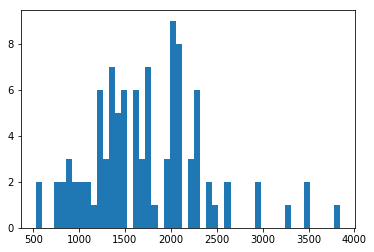

In [88]:
from math import*
import __main__
global PI
import os
import time
PI=float(acos(-1))

import random
import numpy as np
import multiprocessing as mp

import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import lognorm

%matplotlib inline

rs_number = 123
random.seed(rs_number)

data_size = 100;

random_selection = 0

if random_selection==0:
    ''' random selection'''
#     mu = [10,10]
#     cov = [[1, 0], [0, 1]]
#     datasets = np.random.multivariate_normal(mu, cov, data_size)
#     x0 = np.random.uniform(0,3,data_size)
#     x1 = np.random.uniform(0,3,data_size)
#     x = [x0, x1]
#     datasets = np.reshape(x,(data_size,2))
    datasets = np.random.randint(1, 10, size=[data_size, 8])
else:
    '''latin hypercube sampling'''

# print(np.shape(datasets)) 
# plt.plot(datasets[:,0],datasets[:,1],'o')

def ssh(X):
#     c = 4
#     g = sin(X[0]+X[1])
#     g = (X[0]+X[1])**2
#     g = 4-X[0]/4 + sin(4*X[0])-X[1]
#     g = 5 -X[1]- 0.5*(X[0]-0.1)**2
    g = np.sum(X)**2
#     g = 0.7*norm.pdf(X,3,1) + 0.3*norm.pdf(X,6,1)
#     g = 0.7*norm.ppf(X, loc=3, scale=1) + 0.3*norm.ppf(X, loc=10, scale=1)
#     g = lognorm.ppf([0.001, 0.5, 0.999], X)
    return g


# map async parallel 
# pool = mp.Pool(mp.cpu_count())
pool = mp.Pool(processes = 2)

start = time.time()
results_map = pool.map(ssh, datasets)
end = time.time() 
print(end - start) #0.0037827491760253906



# print(results_map)

# # rare event probability
# num = 0
# for i in range(data_size):
#     if results_map[i]<0:
#         num = num+1

# prob = num/data_size
# print(prob)

# results_map = datasets**2
# print(results_map)
plt.hist(results_map,50)


# results_map = 

# Data classification and preprocessing

In [89]:
results_map_sort = sorted(results_map) # note that sorted change the sort but didn't change the original one
# print(results_map_sort)
median_value = results_map_sort[data_size//2]
# median_value = 3.5
print(median_value)

results_map_new = np.zeros((data_size,1))
output_scikit = np.zeros(data_size)

for i in range(data_size):
    if results_map[i] > median_value:
        results_map_new[i,:] = 1
        output_scikit[i] = 1
    else:
        results_map_new[i,:] = 0
        output_scikit[i] = 0

y_data = output_scikit

1681


# Training by classification 

In [90]:
# scikit-learn MLP training 
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_mldata
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression

# preprocessing data scale? X is [1,10]
trans_mean = np.mean(datasets)
trans_std = np.std(datasets)

data_scale = 2
if data_scale==0:
    X_data = preprocessing.scale(datasets)
elif data_scale ==1:
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    X_data = min_max_scaler.fit_transform(datasets)
elif data_scale ==2:
    scaler = preprocessing.StandardScaler().fit(datasets) # can be used for the following iteration 
    X_data = scaler.transform(datasets)  

# sgd optimizer 
# mlp = MLPClassifier(solver='sgd', activation='relu',alpha=1e-4, hidden_layer_sizes=(128, 128),
#                     random_state=1, max_iter=10000,verbose=True)

mlp = MLPClassifier(solver='adam', activation='relu',alpha=1e-4, hidden_layer_sizes=(128,128),
                    random_state=1, max_iter=1000,verbose=True,learning_rate = 'adaptive')

# lbfgs - very slow 
# mlp = MLPClassifier(solver='lbfgs', activation='relu',alpha=1e-4,hidden_layer_sizes=(100,100),
#                     random_state=1,max_iter=50,verbose=10,learning_rate_init=.1)
# adam 
# mlp = MLPClassifier(solver='adam', activation='relu',alpha=1e-4,hidden_layer_sizes=(100,100),
#                     random_state=1,max_iter=50,verbose=10,learning_rate_init=.1)

# testing and training data 
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,random_state=rs_number)

# training 
# kernel = 1.0 * RBF(1.0)
# mlp = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(X_train, y_train)
# print(mlp,score(X_train, y_train))
mlp.fit(X_train, y_train) 

# mlp = LogisticRegression(random_state=0, solver='lbfgs',multi_class='auto',verbose=1, n_jobs = 4).fit(X_train, y_train)

#testing
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (train) for %0.1f%% " % (accuracy * 100))

# # cross-validation 
# score_cv = cross_val_score(mlp, X_data, y_data,cv=5)  
# print(score_cv)

## tuning hyperparameters 

# 10000 data, [0.84457771 0.854      0.8385     0.845      0.85992996], default
# 10000 data, [0.82908546 0.835      0.8235     0.8185     0.82391196], feature[1,10] normalization 效果一般
# 10000 data, [0.86206897 0.8605     0.8375     0.854      0.8154077 ], feature[0,1] normalization 效果一般
# 10000 data, [0.84457771 0.854      0.8385     0.845      0.85992996], StandardScaler()

Iteration 1, loss = 0.69194891
Iteration 2, loss = 0.66593773
Iteration 3, loss = 0.64109688
Iteration 4, loss = 0.61736399
Iteration 5, loss = 0.59487893
Iteration 6, loss = 0.57336398
Iteration 7, loss = 0.55270718
Iteration 8, loss = 0.53276749
Iteration 9, loss = 0.51339071
Iteration 10, loss = 0.49441900
Iteration 11, loss = 0.47588513
Iteration 12, loss = 0.45761723
Iteration 13, loss = 0.43955598
Iteration 14, loss = 0.42178083
Iteration 15, loss = 0.40422377
Iteration 16, loss = 0.38687612
Iteration 17, loss = 0.36980758
Iteration 18, loss = 0.35302532
Iteration 19, loss = 0.33656863
Iteration 20, loss = 0.32042832
Iteration 21, loss = 0.30470951
Iteration 22, loss = 0.28938592
Iteration 23, loss = 0.27453651
Iteration 24, loss = 0.26020367
Iteration 25, loss = 0.24633881
Iteration 26, loss = 0.23297302
Iteration 27, loss = 0.22011047
Iteration 28, loss = 0.20775872
Iteration 29, loss = 0.19597532
Iteration 30, loss = 0.18472960
Iteration 31, loss = 0.17398501
Iteration 32, los

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Iteration 94, loss = 0.00753688
Iteration 95, loss = 0.00731430
Iteration 96, loss = 0.00710134
Iteration 97, loss = 0.00689845
Iteration 98, loss = 0.00670516
Iteration 99, loss = 0.00651977
Iteration 100, loss = 0.00634205
Iteration 101, loss = 0.00617190
Iteration 102, loss = 0.00600894
Iteration 103, loss = 0.00585325
Iteration 104, loss = 0.00570384
Iteration 105, loss = 0.00556104
Iteration 106, loss = 0.00542394
Iteration 107, loss = 0.00529217
Iteration 108, loss = 0.00516578
Iteration 109, loss = 0.00504431
Iteration 110, loss = 0.00492775
Iteration 111, loss = 0.00481584
Iteration 112, loss = 0.00470788
Iteration 113, loss = 0.00460351
Iteration 114, loss = 0.00450324
Iteration 115, loss = 0.00440688
Iteration 116, loss = 0.00431379
Iteration 117, loss = 0.00422357
Iteration 118, loss = 0.00413640
Iteration 119, loss = 0.00405209
Iteration 120, loss = 0.00397046
Iteration 121, loss = 0.00389194
Iteration 122, loss = 0.00381596
Iteration 123, loss = 0.00374271
Iteration 124, l

# ML rank VS FEM rank

[1, 74, 12, 25, 42, 15, 57, 69, 85, 70, 20, 5, 88, 18, 79, 99, 37, 35, 76, 55]
[1, 74, 42, 12, 69, 15, 57, 25, 85, 18, 70, 55, 79, 20, 8, 35, 38, 27, 99, 44]
529
529
729
784
841
841
900
900
900
961
961
1024
1024
1089
1089
1156
1225
1225
1225
1225
1225
1225
1296
1296
1296
1369
1369
1369
1369
1369
1369
1369
1444
1444
1444
1444
1444
1521
1521
1521
1521
1521
1521
1600
1600
1600
1600
1600
1600
1681
1681
1681
1764
1764
1764
1764
1764
1764
1764
1849
1936
1936
1936
2025
2025
2025
2025
2025
2025
2025
2025
2025
2116
2116
2116
2116
2116
2116
2116
2116
2209
2209
2209
2304
2304
2304
2304
2304
2304
2401
2401
2500
2601
2601
2916
2916
3249
3481
3481
3844


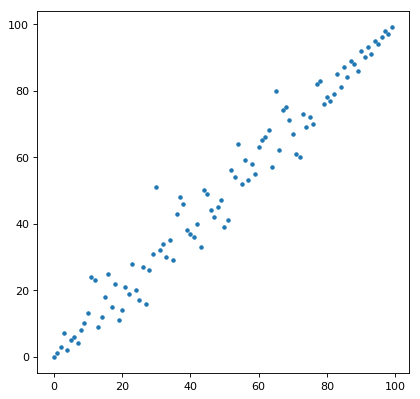

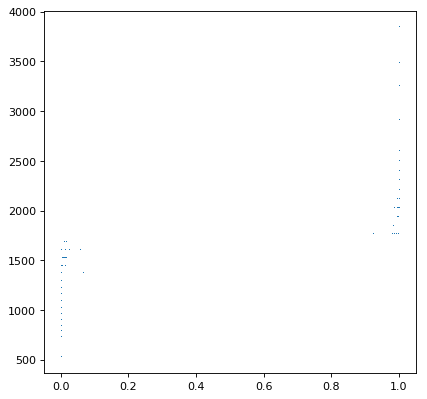

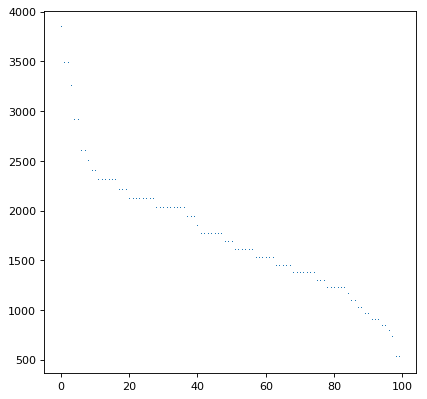

In [91]:
sort_index_FEM = np.argsort(results_map)
probs = mlp.predict_proba(X_data)
# print(probs)
sort_index_mlp = np.argsort(probs[:][:,1])

sort_FEM = sort_index_FEM.tolist()
sort_mlp = sort_index_mlp.tolist()

print(sort_FEM[0:20])
print(sort_mlp[0:20])

rank_mlp = []
for j in range(data_size):
    rank_fem = sort_FEM[j]
    rank_mlp0 = sort_mlp.index(rank_fem)
#     print(rank_mlp0)
    rank_mlp.append(rank_mlp0)


for k in range(100):
    print(results_map[sort_FEM[k]])
#     print(probs[sort_FEM[k]])

# x_min = [[1,1,1,1,1,1,1,1]]
# x_min_scale = scaler.transform(x_min)
# probs0 = mlp.predict_proba(x_min_scale)
# print(probs0) # 8.8598167e-39

# x_min1 = [[2,1,1,1,1,1,1,1]]
# x_min_scale1 = scaler.transform(x_min1)
# probs1 = mlp.predict_proba(x_min_scale1)
# print(probs1) # 1.27207661e-37

# x_min2 = [[1,1,1,1,2,1,1,1]]
# x_min_scale2 = scaler.transform(x_min2)
# probs2 = mlp.predict_proba(x_min_scale2)
# print(probs2) # 1.34410508e-37

# x_min3 = [[1,1,3,1,1,1,1,1]]
# x_min_scale3 = scaler.transform(x_min3)
# probs3 = mlp.predict_proba(x_min_scale3)
# print(probs3) # 4.76664494e-37

# x_min4 = [[1,2,1,1,1,4,1,1]]
# x_min_scale4 = scaler.transform(x_min4)
# probs4 = mlp.predict_proba(x_min_scale4)
# print(probs4) # 1.26143306e-34

# x_min5 = [[1,2,1,2,1,4,1,2]]
# x_min_scale5 = scaler.transform(x_min5)
# probs5 = mlp.predict_proba(x_min_scale5)
# print(probs5) # 3.27949988e-32

    
plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(data_size),rank_mlp,'.')

plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot((probs[:][:,1]), results_map,',')

plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(data_size),-np.sort(-np.asarray(results_map)),',')


In [92]:
# multiple loop training but no call FEM data collection 

loop = 10000
X_loop = X_data # scale data, 50000
X_ori = datasets # orial data, 50000

# training 
# top_10_ori = X_ori[sort_index_mlp[0:int(data_size*0.1)]]
# opt_output_training = pool.map(ssh, top_10_ori)
# print(opt_output_training)

for i in range(loop):
#     print(i)
    # classification probability 
    probs_all = mlp.predict_proba(X_loop)
    sort_index_mlp = np.argsort(probs_all[:][:,1])

    # top 10% selection 
    top_10 = X_loop[sort_index_mlp[0:int(data_size*0.1)]]
    top_10_ori = X_ori[sort_index_mlp[0:int(data_size*0.1)]]
#     print(top_10_ori)

    # random selection 90%
    if random_selection==0:
        ''' random selection'''
        data_random = np.random.randint(1, 10, size=[int(data_size*0.9), 8])
    else:
        '''latin hypercube sampling'''

    X_90_scale = scaler.transform(data_random) 
    X_90_ori = data_random
    X_loop = np.concatenate((X_90_scale, top_10), axis=0)
    X_ori = np.concatenate((X_90_ori, top_10_ori), axis=0)


opt_output = pool.map(ssh, top_10_ori)
print(opt_output)
# len(opt_output)
# loop=10， 576
# loop=100，324
# loop=1000，225
# loop = 10000, 144 

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

[121, 121, 121, 144, 121, 121, 144, 144, 169, 169]


/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py

In [93]:
print(opt_output)

[121, 121, 121, 144, 121, 121, 144, 144, 169, 169]
